In [28]:
# دوره شبکه های پیچیده مدرسه علم داده - بابک تیمورپور
# (Community detection algorithms in networks) الگوریتم های اجتماع یابی در شبکه

In [71]:
import networkx as nx
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman, label_propagation_communities, louvain_communities, modularity
from sklearn.metrics import adjusted_rand_score

### Read zachary dataset graph

In [72]:
zachary = nx.karate_club_graph()

# Print number of nodes and edges
print(zachary)

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


### Set color for graph visualization

In [73]:
mycolor = np.array(list(mcolors.BASE_COLORS.keys()))
print(mycolor)

['b' 'g' 'r' 'c' 'm' 'y' 'k' 'w']


In [74]:
# Change the order of colors to better appearance
mycolor = np.array(['b', 'g', 'r', 'k', 'm', 'c', 'y', 'w'])

#### Performing Community detection using Girvan-Newman algorithm

In [49]:
gn_communities = next(girvan_newman(zachary))
print(gn_communities)

({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})


#### Print community for each node

In [50]:
for c, v_c in enumerate(gn_communities):
            for v in v_c:
                zachary.nodes[v]['gn_community'] = c
node_gn_community = np.array([zachary.nodes[v]['gn_community'] for v in zachary.nodes])
print(node_gn_community)

[0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


#### Calculate modularity for Girvan-Newman algorithm

In [51]:
gn_modularity = modularity(zachary, gn_communities)

# Print the modularity of partition
print("Modularity of Girvan-Newman community detection: {:.3f}".format(gn_modularity))

Modularity of Girvan-Newman community detection: 0.348


#### Visualize the Girvan-Newman communities

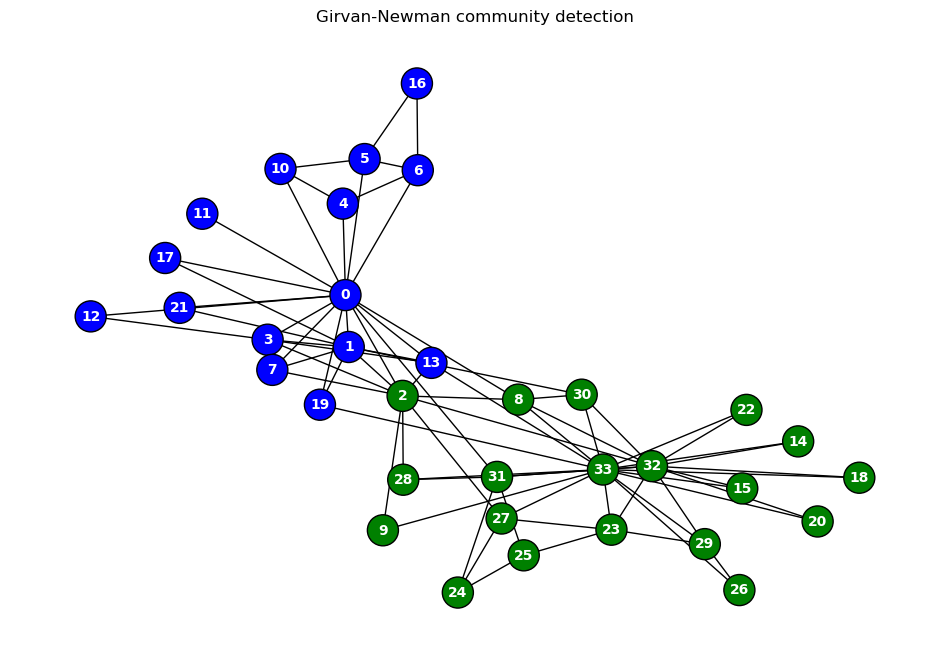

In [52]:
# Set plot area size
plt.figure(figsize=(12,8))

# Remove plot border
plt.axis('off')

# Set the random seed for layout
np.random.seed(1)
# Set the layout for the graph
pos = nx.kamada_kawai_layout(zachary)


# Set the title of the graph
plt.title("Girvan-Newman community detection")

# Draw the graph
nx.draw_networkx(zachary,with_labels=True,
                 node_size=500,
                 font_color="white", font_size=10,
                 node_color=mycolor[node_gn_community],
                 edgecolors="black", font_weight="bold")

#### Performing Community detection using Label Propagation algorithm

In [53]:
lp_communities = label_propagation_communities(zachary)
print(lp_communities)

dict_values([{0, 1, 3, 4, 7, 10, 11, 12, 13, 17, 19, 21, 24, 25, 31}, {32, 33, 2, 8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 28, 29, 30}, {16, 5, 6}])


#### Print community for each node

In [54]:
for c, v_c in enumerate(lp_communities):
            for v in v_c:
                zachary.nodes[v]['lp_community'] = c
node_lp_community = np.array([zachary.nodes[v]['lp_community'] for v in zachary.nodes])
print(node_lp_community)

[0 0 1 0 0 2 2 0 1 1 0 0 0 0 1 1 2 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1]


#### Calculate modularity for Label Propagation algorithm

In [55]:
lp_modularity = modularity(zachary, lp_communities)

# Print the modularity of partition
print("Modularity of Label Propagation community detection: {:.3f}".format(lp_modularity))

Modularity of Label Propagation community detection: 0.309


#### Visualize the Label Propagation communities

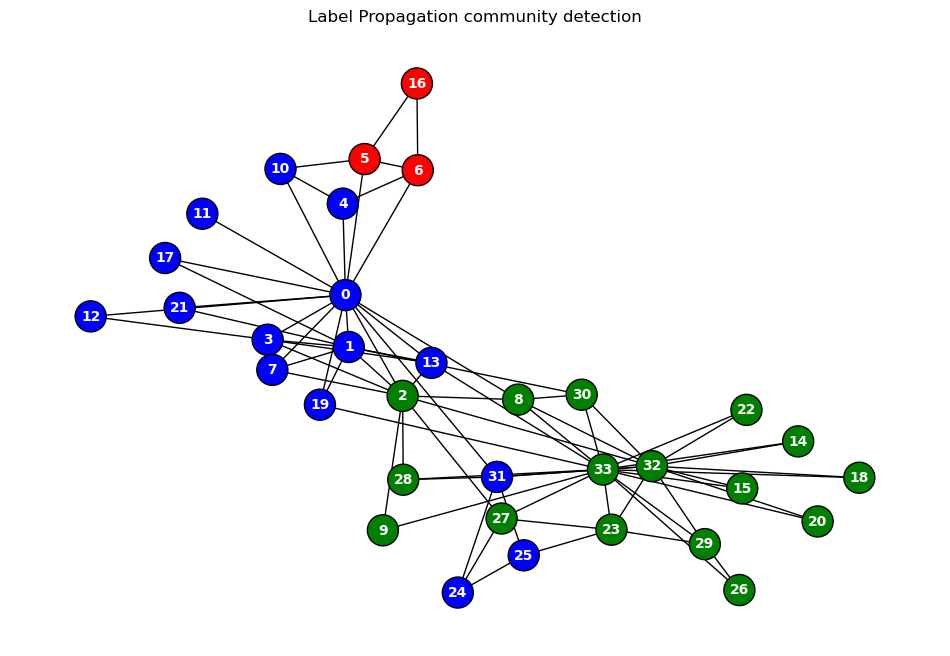

In [56]:
# Set plot area size
plt.figure(figsize=(12,8))

# Remove plot border
plt.axis('off')

# Set the title of the graph
plt.title("Label Propagation community detection")

# Set the random seed for layout
np.random.seed(1)
# Draw the graph
nx.draw_networkx(zachary,with_labels=True,
                 node_size=500,
                 font_color="white", font_size=10,
                 node_color=mycolor[node_lp_community],
                 edgecolors="black", font_weight="bold")

#### Performing Community detection using Louvain algorithm

In [57]:
lv_communities=louvain_communities(zachary, seed=123)
print(lv_communities)

[{1, 2, 3, 7, 12, 13}, {0, 4, 5, 6, 10, 11, 16, 17, 19, 21}, {23, 24, 25, 27, 28, 31}, {32, 33, 8, 9, 14, 15, 18, 20, 22, 26, 29, 30}]


In [58]:
for c, v_c in enumerate(lv_communities):
            for v in v_c:
                zachary.nodes[v]['lv_community'] = c
node_lv_community = np.array([zachary.nodes[v]['lv_community'] for v in zachary.nodes])
print(node_lv_community)

[1 0 0 0 1 1 1 0 3 3 1 1 0 0 3 3 1 1 3 1 3 1 3 2 2 2 3 2 2 3 3 2 3 3]


#### Visualize the Louvain communities

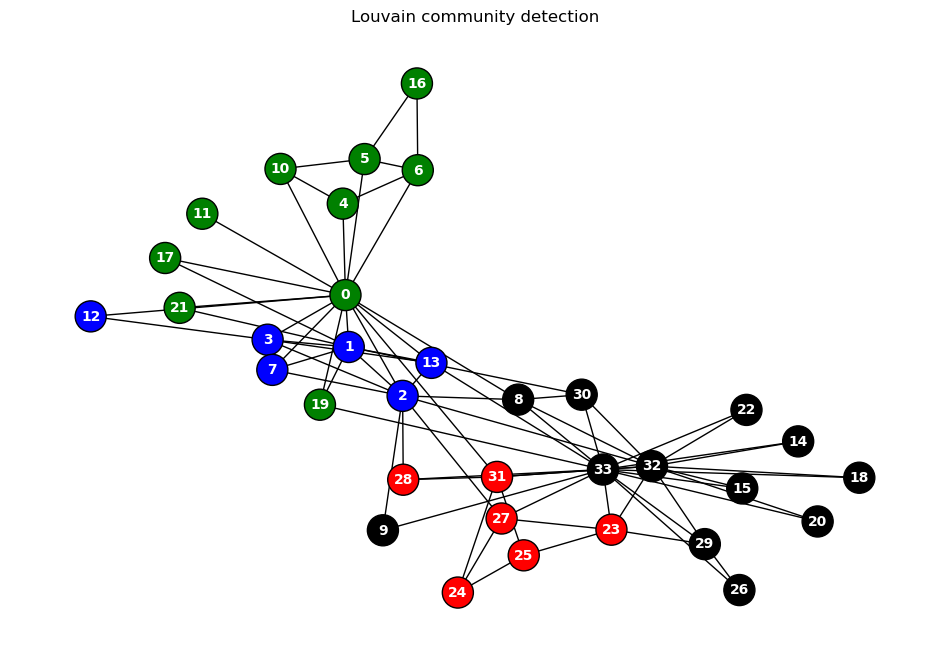

In [59]:
# Set plot area size
plt.figure(figsize=(12,8))

# Remove plot border
plt.axis('off')

# Set the title of the graph
plt.title("Louvain community detection")

# Set the random seed for layout
np.random.seed(1)
# Draw the graph
nx.draw_networkx(zachary,with_labels=True,
                 node_size=500,
                 font_color="white", font_size=10,
                 node_color=mycolor[node_lv_community],
                 edgecolors="black", font_weight="bold")

#### Compare Rand Index for community detection algorithms

In [60]:
# Get the 'club' attribute of each node (every individual club after dividing into two clubs)
club_attribute = [zachary.nodes[i]['club'] for i in zachary.nodes()]
print(club_attribute)

['Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Officer', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Officer', 'Officer', 'Mr. Hi', 'Mr. Hi', 'Officer', 'Mr. Hi', 'Officer', 'Mr. Hi', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer']


In [61]:
# Label each club with 0 or 1 (the ground truth community labels)
ground_truth = [0 if club == 'Mr. Hi' else 1 for club in club_attribute]
print(ground_truth)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


#### Visualize the ground truth community

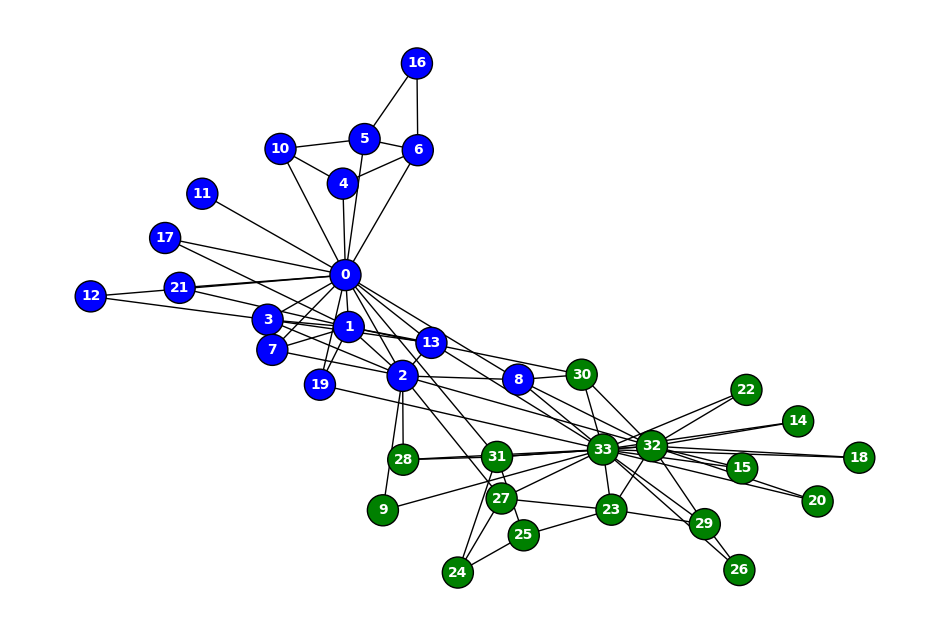

In [62]:
# Set plot area size
plt.figure(figsize=(12,8))

# Remove plot border
plt.axis('off')

# Set the random seed for layout
np.random.seed(1)
# Draw the graph
nx.draw_networkx(zachary,with_labels=True,
                 node_size=500,
                 font_color="white", font_size=10,
                 node_color=mycolor[ground_truth],
                 edgecolors="black", font_weight="bold")

In [63]:
# Calculate Rand Index for Girvan-Newman algorithm based on ground truth
gn_rand_index = adjusted_rand_score(ground_truth, node_gn_community)
print(gn_rand_index)

0.7717250324254216


In [64]:
# Calculate Rand Index for Label Propagation algorithm based on ground truth
lp_rand_index = adjusted_rand_score(ground_truth, node_lp_community)
print(lp_rand_index)

0.3833116036505867


In [65]:
# Calculate Rand Index for Louvain algorithm based on ground truth
lv_rand_index = adjusted_rand_score(ground_truth, node_lv_community)
print(lv_rand_index)

0.4461994076999013


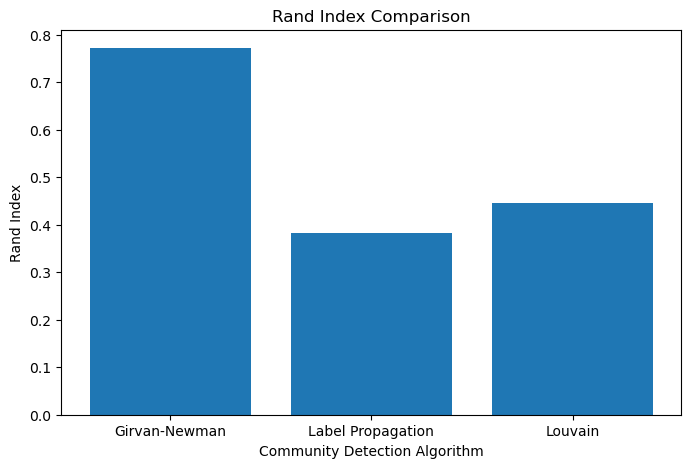

In [66]:
# Create a bar chart for comparing community detection algorithms

# Set plot area size
plt.figure(figsize=(8,5))

plt.bar(['Girvan-Newman', 'Label Propagation', 'Louvain'], [gn_rand_index, lp_rand_index, lv_rand_index])
plt.title('Rand Index Comparison')
plt.xlabel('Community Detection Algorithm')
plt.ylabel('Rand Index')
plt.show()

In [67]:
# کلوب کاراته زاخاری به عنوان یک کلوب واقعی پس از گذشت مدتی از حیات خود به دو کلوب مجزا تقسیم شد یکی از کلوب ها 16 عضو و دیگری 18 عضو دارد
# نمودار فوق نشان می دهد الگوریتم اجتماع یابی گیروان-نیومن با بیشترین نسبت به حالت واقعی، اجتماعات را یافته است. اطلاعات تکمیلی در مورد این
# کلوب در لینک زیر در دسترس است
# https://studentwork.prattsi.org/infovis/labs/zacharys-karate-club/

#### Calculate the shortest distances between all pairs of nodes

In [68]:
# Load graph from edge list
graph01 = nx.read_edgelist("graph01.txt")

# Convert node IDs from strings to integers
graph01 = nx.relabel.convert_node_labels_to_integers(graph01, first_label=0)

print(graph01)
print(graph01.nodes())

Graph with 8 nodes and 12 edges
[0, 1, 2, 3, 4, 5, 6, 7]


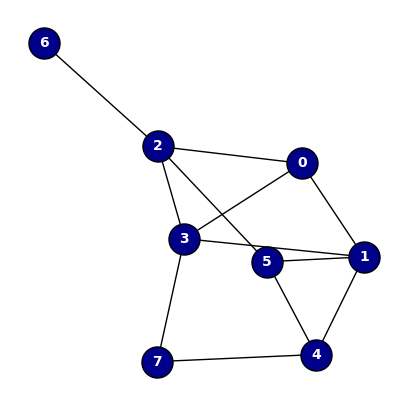

In [69]:
# Visualize the graph

# Set plot area size
plt.figure(figsize=(5,5))

# Remove plot border
plt.axis('off')

# Set the random seed for layout
np.random.seed(1)
# Draw the graph
nx.draw_networkx(graph01,with_labels=True,
                 node_size=500,
                 font_color="white", font_size=10,
                 node_color="darkblue",
                 edgecolors="black", font_weight="bold")

In [70]:
distances = dict(nx.shortest_path_length(graph01))

# Get a list of all nodes in the graph
nodes = list(graph01.nodes())

# Initialize a matrix of distances with infinite values
distance_matrix = np.full((len(nodes), len(nodes)), np.inf)

# Fill in the matrix with the shortest distances
for i, source in enumerate(nodes):
    for j, target in enumerate(nodes):
        if source == target:
            distance_matrix[i, j] = 0
        elif target in distances[source]:
            distance_matrix[i, j] = distances[source][target]

# Print the matrix
print(distance_matrix)

[[0. 1. 1. 1. 2. 2. 2. 2.]
 [1. 0. 2. 1. 1. 1. 3. 2.]
 [1. 2. 0. 1. 2. 1. 1. 2.]
 [1. 1. 1. 0. 2. 2. 2. 1.]
 [2. 1. 2. 2. 0. 1. 3. 1.]
 [2. 1. 1. 2. 1. 0. 2. 2.]
 [2. 3. 1. 2. 3. 2. 0. 3.]
 [2. 2. 2. 1. 1. 2. 3. 0.]]
